# Μια **πρακτική**  εισαγωγή στην Αστροστατιστική
---
δηλαδή εφαρμοσμένη στατιστική με ...*εφαρμογές* στην Αστρονομία

### Που μας χρειάζεται η στατιστικη 
(obvious)

### Βιβλιογραφία
1.Statistics, data mining, and machine learning in astronomy: a practical Python guide for the analysis of survey data. (Princeton University Press, 2014).

2.Wall, J. V. & Jenkins, C. R. Practical statistics for astronomers. (Cambridge University Press, 2003).

3.Chattopadhyay, A. K. & Chattopadhyay, T. Statistical Methods for Astronomical Data Analysis. 3, (Springer New York, 2014).

## Πιθανότητες και βασικές κατανομές
Παρακάτω θα εξετάσουμε κάποιες βασικές κατανομές, με μερικές πρακτικές εφαρμογές.
### Κατανομές στη Python μέσω της Scipy
Η ```scipy``` μας παρέχει όλες τις κατανομές μέσω του module ```scipy.stats```.
Ετσι για παράδειγμα μπορούμε να δούμε διάφορες ιδιότητες/μεθόδους της κατανομής Poisson μέσω της instance ```scipy.stats.poisson```.
Προσοχή, αυτό που θεωρούμε σαν κατανομή είναι στη πραγματικότητα αυτο που λέμε συνάρτηση πυκνότητας της κατανομής. Δηλαδή η συνάρτηση πυκνότητας της κατανομής Poisson μέσω της παραπάνω instance βρίσκεται από ```scipy.stats.poisson.pmf()```.

Για λόγους συντομίας φορτώνουμε όλοκληρο το module ```stats``` ενώ ταυτόχρονα φορτώνουμε τις standard βιβλιοθήκες ```numpy``` και ```matplotlib```

In [12]:
from scipy import stats
from scipy import integrate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (9, 5.5)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['axes.titlesize']=20.
import seaborn as sb
sb.despine()
sb.set_style('white', {'xes.linewidth': 0.5, 'axes.edgecolor':'black'})
sb.despine(left=True)

<Figure size 648x396 with 0 Axes>

### Ομοιογενής (uniform) Κατανομή


### Διωνυμική (binomial) Κατανομή
H διωνυμική κατανομή μας δείχνει τον αριθμό των επιτυχιών $k$ ενός πειράματος με δύο δυνατά αποτελέσματα (Bernouli trials) δεδομένου της πιθανότητας $p$ επιτυχίας ενός πειράματος και του συνολικού αριθμού $n$ των πειραμάτων. 

Η πυκνότητα πιθανότητας δίνεται από την:
$$
Pr(k;n,p)=\binom{n}{k}p^k (1-p)^{n-k}
$$

Η πιθανότερη τιμή της κατανομής είναι:
$$
E[k]=np
$$
και η διακύμανση
$$
var[k]=np(1-p) =\sigma ^2
$$

#### Παράδειγμα 1
Ποιά είναι η κατανομή πιθανοτήτων των φορών που θα έχουμε γράμματα αν ρίξουμε ένα νόμισμα 10 φορές?

<BarContainer object of 10 artists>

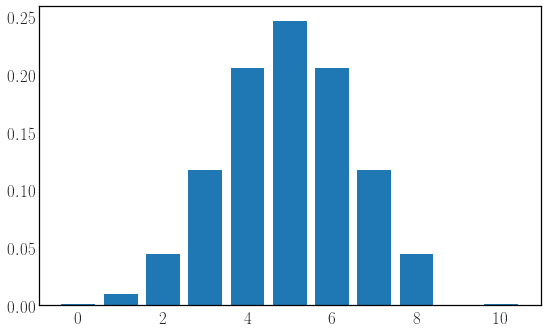

In [13]:
kk=np.linspace(0,10,10,dtype=int)
pr=stats.binom.pmf(kk,p=0.5,n=10)
plt.bar(kk,pr)

#### Παράδειγμα 2
Υποθέστε ότι γνωρίζουμε από ένα δείγμα 100 γαλαξιακών σμηνών ότι σε 10 από αυτά περιέχεται ένας κυρίαρχος κεντρικός γαλαξίας. Σκοπέυουμε να ελέγξουμε ένα δεύτερο διαφορετικό δείγμα από 30 σμήνη, τα οποία έχουνε επιλεχθεί για παράδειγμα από έναν κατάλογο ακτίνων Χ. 

* Σε πόσους από αυτους περιμένουμε να υπάρχει το αντίστοιχο φαινόμενο. 

* Ποια η πιθανότητα να παρατήρησουμε παραπάνω από 8?

---

Υποθέτουμε ότι $p=0.1$ άρα 
$$
Pr(k)=\binom{30}{k}0.1^k 0.9^{30-k}
$$
(Η κατανομή φαίνεται από το διαγραμμα παρακάτω.)

* Η πιθανότερη τιμή είναι $\mu= 3$ με τυπική απόκλιση $\sigma = 1.6$

* Η πιθανότητα να δούμε περισσότερους από 8 είναι:
$$
Pr(k>8)=\sum _{i=8}^{30} Pr(i) = 0.02
$$

Τι θα προτείνατε σε περίπτωση που παρατήρησουμε πχ 10 γαλαξίες?

Pr(k>8)=0.002
Pr(k=10)=0.00037


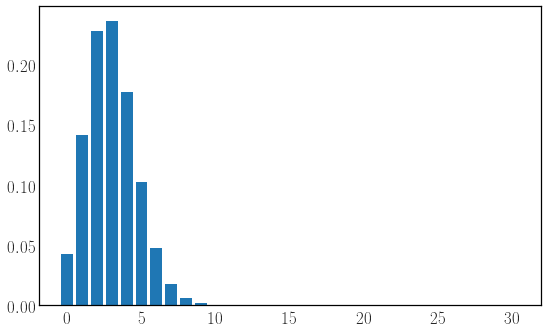

In [14]:
kk=np.linspace(0,30,30,dtype=int)
pr=stats.binom.pmf(kk,p=0.1,n=30)
plt.bar(kk,pr)
print('Pr(k>8)={:.3f}'.format(pr[kk>8].sum()))
print('Pr(k=10)={:.5f}'.format(pr[10]))

#### Παράδειγμα 3
Στο facebook γκρουπ του Μαθηματικού έγινε μια ψηφοφορία για τη κατανομή των ζωδίων των μελών του γκρουπ. Με βάση τα δεδομένα (που δίνονται παρακάτω) μπορούμε να βγάλουμε συμπεράσματα για την κατανομή γεννήσεων μέσα στο έτος?

<BarContainer object of 12 artists>

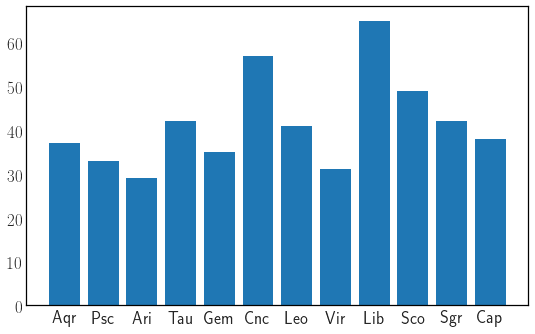

In [15]:
data=np.array([37,33,29,42,35,57,41,31,65,49,42,38])
names=['Aqr','Psc','Ari','Tau','Gem','Cnc',
      'Leo','Vir','Lib','Sco','Sgr','Cap']
plt.bar(names,data,label='Data')

Κάνουμε την υπόθεση (null hypothesis) οτί η κατανομή των γεννήσεων είναι ισοπίθανη μέσα στο έτος. Άρα θα περιμένουμε ότι ο αριθμός ανθρώπων ανα ζώδιο προέρχεται από ομοιογενή κατανομή.

Η πιθανότητα να παρατηρήσουμε έναν συγκεκριμένο αριθμό ατόμων δίνεται από μια διωνυμική κατανομή με πιθανότητα $p=1/12$. Ο αριθμος των ατομων ειναι $n=499$.
Άρα η τυπική τιμή είναι $np=41.6$ με τυπική απόκλιση $\sigma = 6.2$

In [16]:
N=data.sum()
p=1/12
mu=N*p
var=((p)*(1-p))*N
sd=np.sqrt(var)
print('E[X] = {:.2f} / var[X] = {:.2f} (sigma = {:.2f})'.format(mu,var,sd))

E[X] = 41.58 / var[X] = 38.12 (sigma = 6.17)


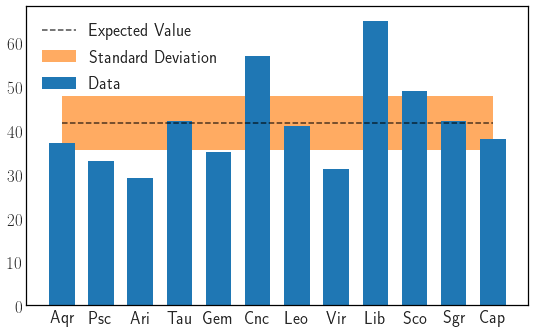

In [17]:
plt.bar(names,data,width=0.65,label='Data')
plt.hlines(mu,0,11,linestyles='--',label='Expected Value',alpha=0.7)
plt.fill_between(range(12),(mu-sd)*np.ones(12),(mu+sd)*np.ones(12),alpha=0.65,label='Standard Deviation')
plt.legend(loc=2)

Γεια να εξέτασουμε αν ισχύει η υπόθεση θα χρησιμοποιήσουμε το λεγόμενο $x^2$ test του Pearson. 
Τα δεδομένα μας αποτελούνται από $K=12$ διακριτές τιμές $D_i$. Θεωρώντας τα "υποτιθέμενα" δεδομένα $D_{h_i}$ τα οποία στη περίπτωση μας για ομοιογενή κατανομή είναι η τυπική τιμή $np$

Όριζουμε τη μετρική $x^2$ -για την οποία θα μιλήσουμε κι αργότερα-:
$$
x^2=\sum_{i=1} ^{K} \frac{(D_i-D_{h_i})^2}{D_{h_i}} = \sum_{i=1} ^{12} \frac{(D_i-np)^2}{np} = 30.37
$$

Στη συνέχεια συγκρίνουμε τη τιμή που μετρήσαμε με τη θεωρητική κατανομή της $x^2$ για $K-1$ βαθμούς ελευθερίας (1 βαθμός ελευθερίας λιγότερος λόγω του μοντέλου που επιλέξαμε).  

Η κατανομή της $x^2$ (θα την ονομάσουμε $\text{chi2}(x)$) αντιπροσωπέυει τη πιθανότητα οι διακυμάνσεις των παρατηρήσεων από τα υποτιθέμενα δεδομένα να είναι τυχαίες. Ο υπολογισμός της πιθανότητας λοιπόν οι παραπάων παρατηρήσεις να είναι τυχαίες δίνονται από τη σχέση:
$$
P=\int _{x^2} ^{\infty} \text{chi2}(x) dx = 0.0014
$$

Άρα η πιθανότητα η κατανομή των γεννήσεων ανα μήνα να είναι ομοιογενής στο έτος σύμφωνα με τα παραπάνω δεδομένα είναι 0.14%. Επιλέγοντας μια κρίσιμη τιμή που συνήθως είναι το 5% βγάζουμε το συμπερασμα ότι η υπόθεση μας **απορρίπτεται**.


x^2 = 30.37 / x^2 (reduced) = 2.76
P value = 0.0014
Null Hypothesis is Rejected


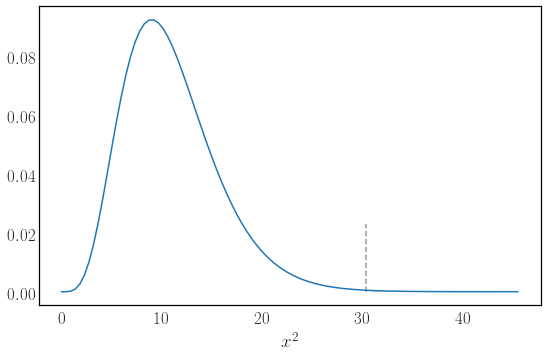

In [21]:
x2=np.sum((N*p-data)**2/(N*p))
print('x^2 = {:.2f} / x^2 (reduced) = {:.2f}'.format(x2,x2/11))

def chi2d(x): return stats.chi2.pdf(x,11)

xx=np.linspace(0,1.5*x2,100)
plt.plot(xx,chi2d(xx))
plt.vlines(x2,0,chi2d(xx).max()/4,linestyles='--',alpha=0.4)
plt.fill_between(xx[xx>x2],0,chi2d(xx)[xx>x2],alpha=0.25)
plt.xlabel('$x^2$')

P=integrate.quad(chi2d,x2,100)[0]
Pc=0.05
print('P value = {:.4f}'.format(P))
NH = 'Accepted' if P>Pc else 'Rejected'
print('Null Hypothesis is {}'.format(NH))

### Κατανομή Poisson
Η κατανομή Poisson είναι μια διακριτή κατανομή του αριθμού γεγονότων σε ένα συγκεκριμένο χρονικό διάστημα δεδομένου του μέσου αριθμού γεγονότων $\mu$ για αυτό το διάστημα. Η συνάρτηση πυκνότητας πιθανότητας είναι:
$$
Pr(x;\mu)=\frac{\mu ^x e^{-\mu}}{x!}
$$

Η πιθανότερη τιμή της κατανομής καί η διακύμανση είναι:
\begin{align}
E[x]=\mu && var[x]=\sigma ^2=\mu
\end{align}

#### Παράδειγμα
Σε έναν αγώνα ποδοσφαίρου μπαίνουν κατα μέσο όρο $2.5$ γκόλ. Ποιά είναι η πιθανότητα να μπούν $x$ γκόλ?

<BarContainer object of 9 artists>

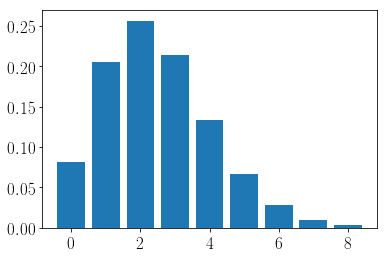

In [9]:
xx=np.linspace(0,8,9,dtype=int)
pr=stats.poisson.pmf(xx,mu=2.5)
plt.bar(xx,pr)

### Κανονική Κατανομή (Gaussian)

## Τυχαίες μεταβλητές 
(σελ 72 απο 1)